<a href="https://colab.research.google.com/github/ayman-metwally2020/Anomaly-Detection-/blob/main/anomaly_detection_part_5_exercises_with_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANOMALY DETECTION DAY 3/ANOMALY DETECTION PART 5 EXERCISE ANSWERS ##
#### Exercise 1 ####
#### Task 1
##### Import the required packages
##### Set the working directory to data directory
##### Print the working directory and the plot directory
#### Result:


In [ ]:
import os
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime
# Set 'main_dir' to location of the project folder
from pathlib import Path
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(main_dir)
data_dir = str(main_dir) + "/content/data"
print(data_dir)


/
//content/data


#### Task 2
##### Load `PJM_Load_hourly.csv` dataset and print the head. Save as `pjm_load`.
##### Convert `Datatime` variable from type `object` to `datetime`. Check its datatype after type-conversion
##### Filter the data to include values post year 2001 and check its shape
#### Result:


In [ ]:
pjm_load = pd.read_csv(str(data_dir)+"/PJM_Load_hourly.csv")
print(pjm_load.head())
pjm_load['Datetime'] = pd.to_datetime(pjm_load['Datetime'])
pjm_load.dtypes
pjm_load = pjm_load.sort_values(by=['Datetime'])
pjm_load = pjm_load[pjm_load['Datetime'] > '2001-01-01 00:00:00']
pjm_load.shape


              Datetime  PJM_Load_MW
0  1998-12-31 01:00:00      29309.0
1  1998-12-31 02:00:00      28236.0
2  1998-12-31 03:00:00      27692.0
3  1998-12-31 04:00:00      27596.0
4  1998-12-31 05:00:00      27888.0


(8758, 2)

#### Task 3
##### Extract the dates from the datetime variable and calculate the mean of the load for each day
##### Visualize the timeseries with `Date` and `PJM_Load_MW` data using a lineplot
#### Result:


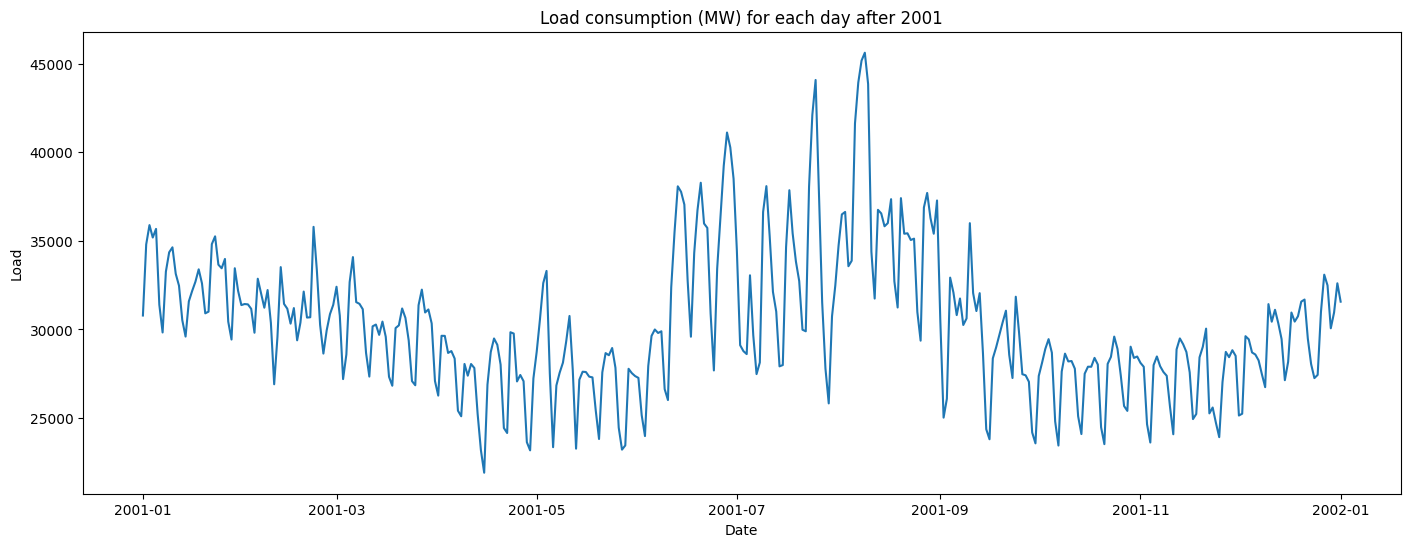

In [ ]:
pjm_load['Date'] = pjm_load['Datetime'].dt.date
pjm_load_datewise = pjm_load.groupby(by=['Date'])['PJM_Load_MW'].mean()
pjm_load_datewise.plot(x='Date', y='PJM_Load_MW', figsize=(17,6))
plt.xlabel('Date')
plt.ylabel('Load')
plt.title('Load consumption (MW) for each day after 2001')
plt.show()


#### Task 4
##### Check the stationarity test by performing ADF test using `adfuller`
##### Print the p-value
##### Interpret the results
#### Result:


In [ ]:
# Perform ADF test on original series.
result_pm_ex = adfuller(pjm_load_datewise)
print('ADF Statistic: %f' % result_pm_ex[0])
print('p-value: %f' % result_pm_ex[1])
#Since the p-value is greater than 0.05 we cannot reject the null hypothesis. Hence the data is not stationary


ADF Statistic: -2.156343
p-value: 0.222470


#### Task 5
##### Fit an ARIMA model to the data.
##### Calculate residuals and detect anomalies using a threshold.
#### Result:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


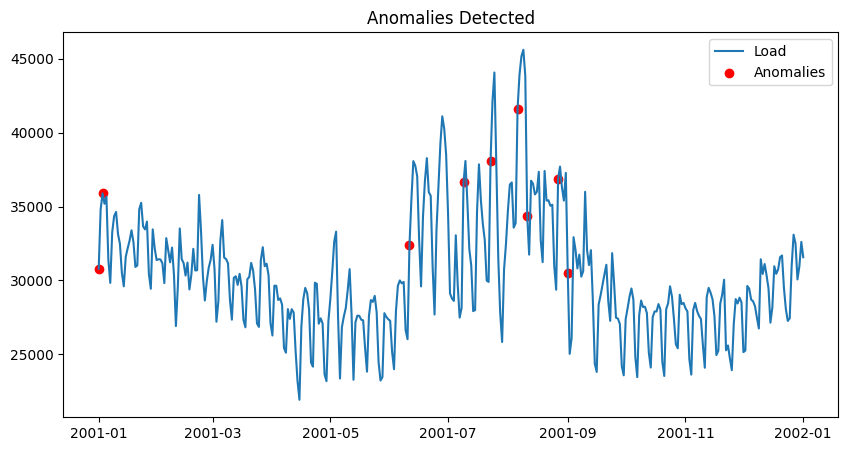

In [ ]:
# Fit the ARIMA model
model = ARIMA(pjm_load_datewise, order=(2, 1, 2))
fitted_model = model.fit()
# Calculate residuals
residuals = pjm_load_datewise - fitted_model.fittedvalues
residuals = residuals.dropna()
# Set a threshold for anomalies
threshold = 2 * np.std(residuals)
anomalies = residuals[np.abs(residuals) > threshold]
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(pjm_load_datewise, label="Load")
plt.scatter(anomalies.index, pjm_load_datewise[anomalies.index], color='red', label="Anomalies")
plt.legend()
plt.title("Anomalies Detected")
plt.show()
